# Exploratory Data Analysis - Housing Price Dataset

This notebook performs comprehensive exploratory data analysis (EDA) on the cleaned housing dataset. The analysis includes:

- **Data Overview**: Understanding dataset structure, dimensions, and basic information
- **Missing Value Analysis**: Identifying and assessing data completeness
- **Statistical Summary**: Computing descriptive statistics for all features
- **Data Visualization**: Creating visualizations to understand distributions and relationships
- **Correlation Analysis**: Examining relationships between features and target variable

## Objectives

1. Understand the distribution of house prices
2. Identify relationships between features
3. Detect potential outliers and anomalies
4. Prepare insights for feature engineering and modeling

In [2]:
# Import required libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization settings
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
print("✅ Libraries imported successfully.")

✅ Libraries imported successfully.


## Step 1: Load Processed Dataset

Load the cleaned dataset that was prepared in the data preprocessing pipeline.

In [3]:
# Load the cleaned dataset from the processed data directory
housing_df = pd.read_csv('../data/processed/cleaned_house_data.csv')

# Display basic information about the dataset
print(f"📐 Dataset shape (rows, columns): {housing_df.shape}")
print("\n📊 Dataset Information:")
print(housing_df.info())


📐 Dataset shape (rows, columns): (84, 7)

📊 Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       84 non-null     int64  
 1   sqft        84 non-null     int64  
 2   bedrooms    84 non-null     int64  
 3   bathrooms   84 non-null     float64
 4   location    84 non-null     object 
 5   year_built  84 non-null     int64  
 6   condition   84 non-null     object 
dtypes: float64(1), int64(4), object(2)
memory usage: 4.7+ KB
None


## Step 2: Missing Value Analysis

Check for missing values to assess data quality and completeness. Missing values can significantly impact model performance and require appropriate handling strategies.

In [4]:
# Check for missing values in each column
print("\n🔍 Missing Values Analysis:")
missing_values = housing_df.isnull().sum()
print(missing_values)

if missing_values.sum() > 0:
    print(f"\n⚠️ Total missing values: {missing_values.sum()}")
    print(f"Percentage of missing data: {(missing_values.sum() / len(housing_df) * 100):.2f}%")
else:
    print("\n✅ No missing values detected. Dataset is complete.")


🔍 Missing Values Analysis:
price         0
sqft          0
bedrooms      0
bathrooms     0
location      0
year_built    0
condition     0
dtype: int64

✅ No missing values detected. Dataset is complete.


## Step 3: Statistical Summary

Generate descriptive statistics for all numeric columns. This provides insights into:
- Central tendencies (mean, median)
- Variability (standard deviation, range)
- Distribution shape (skewness, kurtosis)
- Potential outliers

In [5]:
# Generate comprehensive descriptive statistics for numeric columns
print("\n📋 Statistical Summary of Numeric Features:")
print(housing_df.describe())

# Additional summary information
print(f"\n📊 Dataset Overview:")
print(f"  - Total records: {len(housing_df)}")
print(f"  - Numeric features: {len(housing_df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"  - Categorical features: {len(housing_df.select_dtypes(include=['object']).columns)}")



📋 Statistical Summary of Numeric Features:
              price         sqft   bedrooms  bathrooms   year_built
count  8.400000e+01    84.000000  84.000000  84.000000    84.000000
mean   6.285595e+05  2191.500000   2.857143   2.190476  1982.047619
std    3.591678e+05   650.017117   0.852252   0.828356    19.501563
min    2.490000e+05  1350.000000   2.000000   1.000000  1947.000000
25%    3.742500e+05  1695.000000   2.000000   1.500000  1965.000000
50%    5.110000e+05  1995.000000   3.000000   2.000000  1982.500000
75%    7.292500e+05  2590.000000   3.000000   2.500000  1995.500000
max    1.680000e+06  3850.000000   5.000000   4.500000  2019.000000

📊 Dataset Overview:
  - Total records: 84
  - Numeric features: 5
  - Categorical features: 2


## Step 4: Price Distribution Visualization

Visualize the distribution of house prices to understand:
- Price range and central tendency
- Distribution shape (normal, skewed, etc.)
- Presence of outliers
- Potential need for data transformation

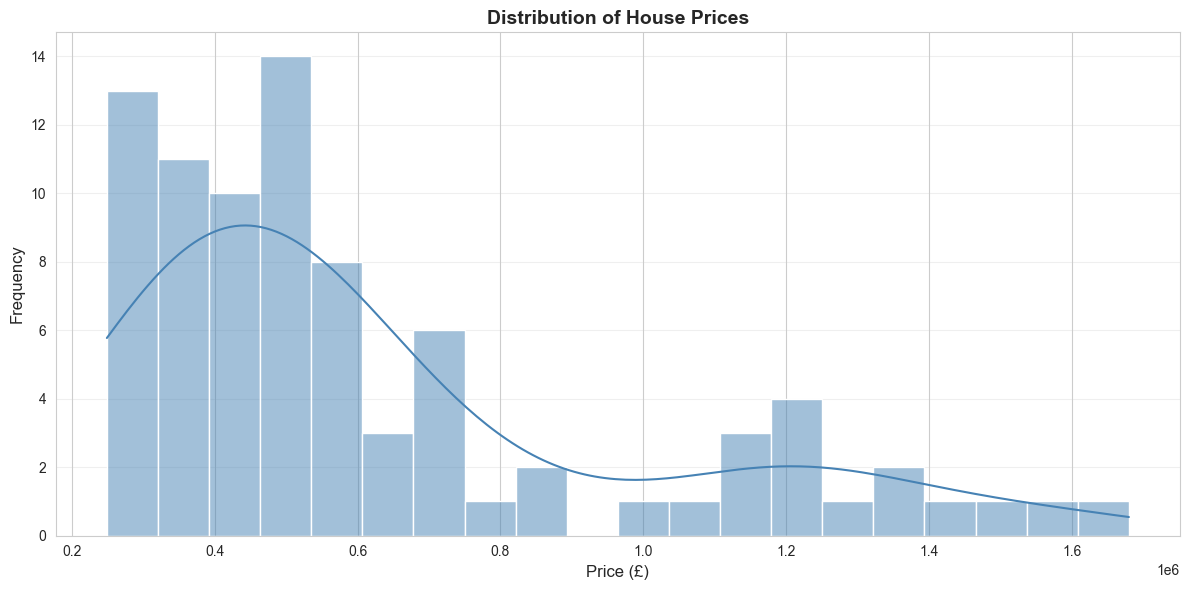

✅ Price distribution visualization completed.


In [6]:
# Visualize the distribution of house prices
plt.figure(figsize=(12, 6))
sns.histplot(housing_df['price'], kde=True, bins=20, color='steelblue')
plt.title('Distribution of House Prices', fontsize=14, fontweight='bold')
plt.xlabel('Price (£)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("✅ Price distribution visualization completed.")

## Step 5: Feature Correlation Analysis

Analyze correlations between features to:
- Identify multicollinearity issues
- Discover strong relationships between features
- Understand which features are most predictive of house prices
- Guide feature selection for modeling


🔗 Computing feature correlation matrix...


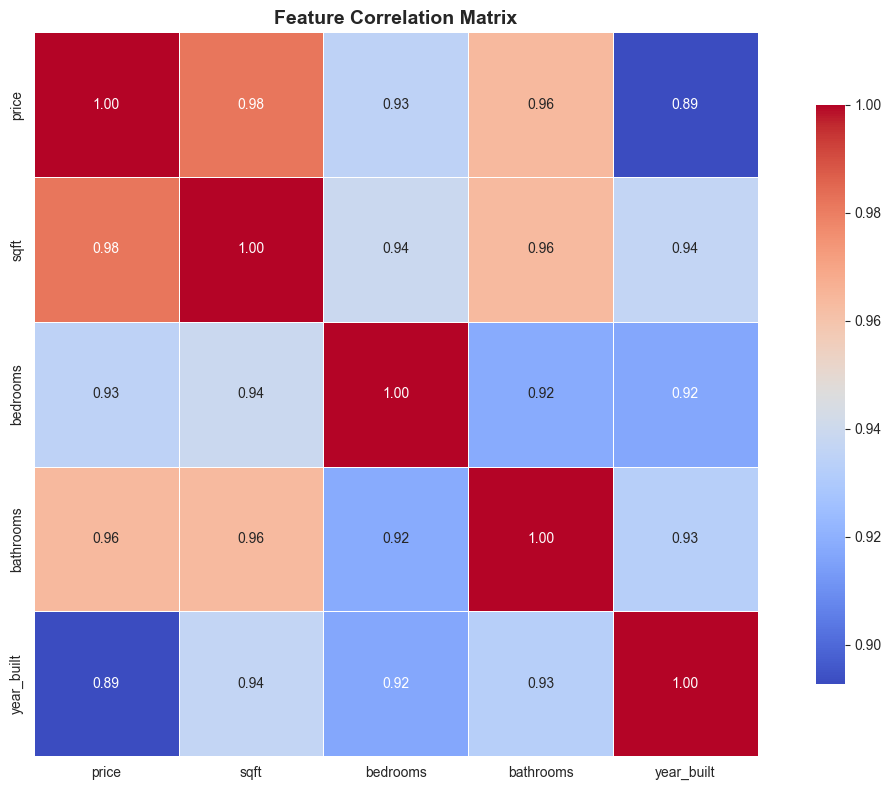


📊 Correlation with Price (target variable):
price         1.000000
sqft          0.981803
bathrooms     0.963959
bedrooms      0.934870
year_built    0.892736
Name: price, dtype: float64

✅ Correlation analysis completed.


In [7]:
# Calculate and visualize correlation matrix for numeric features
print("\n🔗 Computing feature correlation matrix...")

# Select only numeric columns for correlation analysis
numeric_features = housing_df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_features.corr()

# Create correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Display correlation with target variable (price)
print("\n📊 Correlation with Price (target variable):")
price_correlations = correlation_matrix['price'].sort_values(ascending=False)
print(price_correlations)

print("\n✅ Correlation analysis completed.")


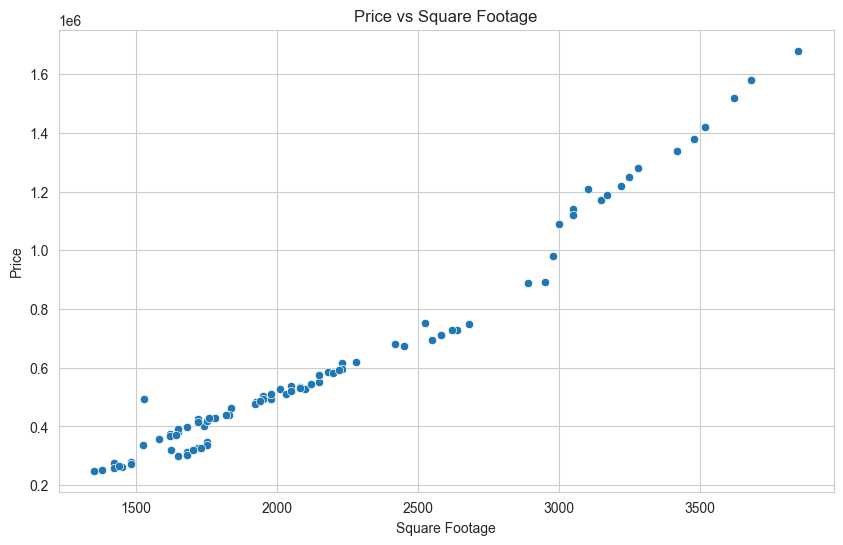

📐 Analyzed relation between square footage and price.


In [11]:
# 📏 Scatter plot to observe relationship between sqft and price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft', y='price', data=housing_df)
plt.title('Price vs Square Footage')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.show()

print("📐 Analyzed relation between square footage and price.")


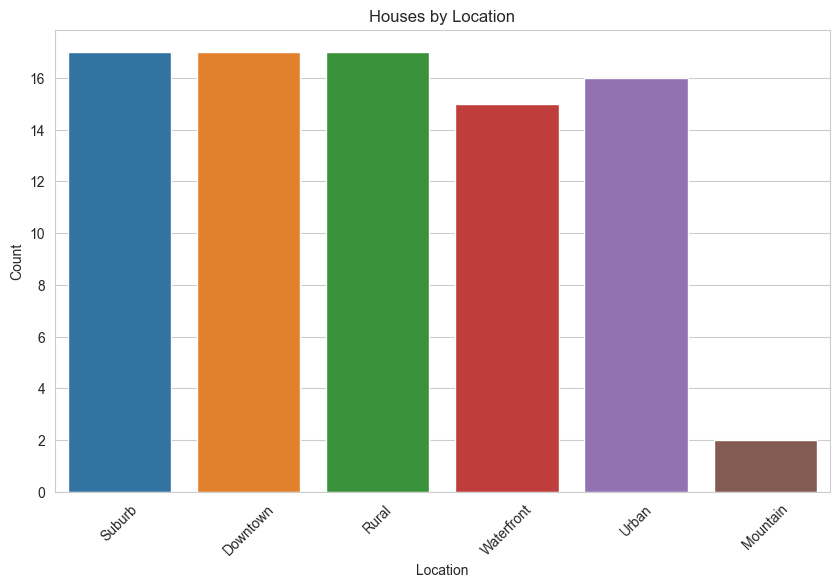

📍 Visualized distribution of houses by location.


In [12]:
# 📍 Bar chart to see how many houses exist in each location
plt.figure(figsize=(10, 6))
sns.countplot(x='location', data=housing_df)
plt.title('Houses by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

print("📍 Visualized distribution of houses by location.")


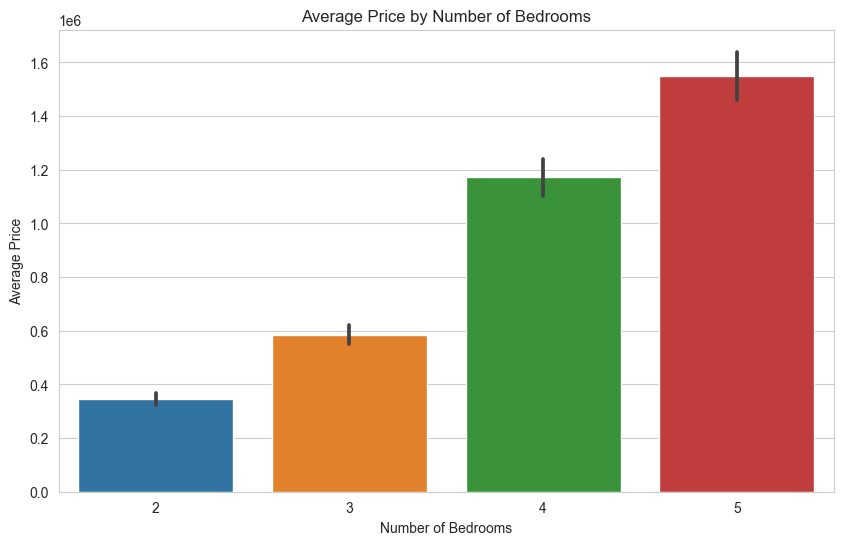

🛏️ Compared average prices based on bedroom count.


In [13]:
# 🛏️ Bar chart showing how average house price varies by bedroom count
plt.figure(figsize=(10, 6))
sns.barplot(x='bedrooms', y='price', data=housing_df)
plt.title('Average Price by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price')
plt.show()

print("🛏️ Compared average prices based on bedroom count.")
